## Importación de las librerías a usar

In [3]:
# Generación del alfabeto inglés
import string
alphabet = list(string.ascii_uppercase)
alphabet = ['!'] + alphabet

# Análisis exploratorio y estructura de la información
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from itertools import product

# Métricas de error y metodología de validación
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, train_test_split

# Para embellecer las gráficas
sns.set()


import tensorflow as tf

%matplotlib inline
%load_ext tensorboard

# from sklearn.datasets import *
# from local.lib import mlutils
# tf.__version__
import pandas as pd
import gdown



The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


# Lectura y exploración del dataset

## Dataset para entrenamiento

In [4]:
df_train = gdown.download('https://drive.google.com/uc?id=1j9wYmC-gjh2p7o4skayM1tgPFo2lzZb9', 'data.csv', quiet=False); df_train = pd.read_csv('data.csv')


Downloading...
From: https://drive.google.com/uc?id=1j9wYmC-gjh2p7o4skayM1tgPFo2lzZb9
To: /content/data.csv
100%|██████████| 39.1M/39.1M [00:00<00:00, 75.0MB/s]


In [5]:
df_train.empty

False

In [6]:
X_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]

In [7]:
np.array(X_train.iloc[1000]).reshape(28,28)

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255,   7,   1, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 254, 254, 208, 254, 254, 254, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 254,  46, 255, 253, 254,   1, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        254, 254, 255, 255,   1,   0, 255, 118, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
          0, 255,   1, 253, 255,   1, 255, 254, 255, 255, 255, 255, 255,
        255, 255],
       [25

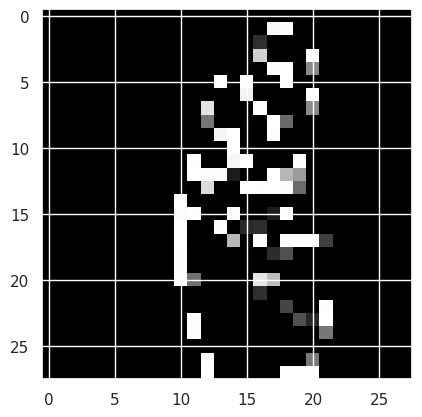

In [8]:
plt.imshow(np.array(X_train.iloc[1000]).reshape((28,28)), cmap="binary")
plt.show()


## Dataset para test

In [9]:
df_test = gdown.download('https://drive.google.com/uc?id=1sPxsIUC4FlxiOaF7jcDc19L-cSsl9Ul9', 'data.csv', quiet=False); df_train = pd.read_csv('data.csv')
df_test = pd.read_csv('data.csv')

# Check for NaN values in the 'label' column in the test dataset
print("Number of NaN values in 'label' column in df_test before dropping:", df_test.label.isna().sum())

# Drop rows where the 'label' is NaN specifically from the test dataframe
df_test.dropna(subset=['label'], inplace=True)

# Re-check for NaN values (should be 0 if any were dropped)
print("Number of NaN values in 'label' column in df_test after dropping:", df_test.label.isna().sum())

# Convert the 'label' column to integer type after dropping NaNs
df_test['label'] = df_test['label'].astype(int)

X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

Downloading...
From: https://drive.google.com/uc?id=1sPxsIUC4FlxiOaF7jcDc19L-cSsl9Ul9
To: /content/data.csv
100%|██████████| 13.0M/13.0M [00:00<00:00, 62.9MB/s]


Number of NaN values in 'label' column in df_test before dropping: 0
Number of NaN values in 'label' column in df_test after dropping: 0


In [10]:
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

## Análisis de los dataset unidos

In [11]:
df = pd.concat([df_train, df_test])
df

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
4,255,255,255,255,255,255,253,255,255,255,...,255,255,255,255,255,255,255,255,255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,26
4263,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,26
4264,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,26
4265,255,255,255,252,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,26


In [12]:
df.reset_index(drop=True, inplace=True)

In [13]:
# Check for NaN values in the 'label' column after concatenation
print("Number of NaN values in 'label' column before dropping:", df.label.isna().sum())

# Drop rows where the 'label' is NaN
df.dropna(subset=['label'], inplace=True)

# Re-check for NaN values (should be 0)
print("Number of NaN values in 'label' column after dropping:", df.label.isna().sum())

# Now attempt the conversion to int and apply the lambda function
df.label.astype(int).apply(lambda index_letter: alphabet[ index_letter ])

Number of NaN values in 'label' column before dropping: 0
Number of NaN values in 'label' column after dropping: 0


,label
0,!
1,!
2,!
3,!
4,!
...,...
8529,Z
8530,Z
8531,Z
8532,Z


In [14]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

ñ = 14

Number of NaN values in 'label' column before dropping: 0
Number of NaN values in 'label' column after dropping: 0


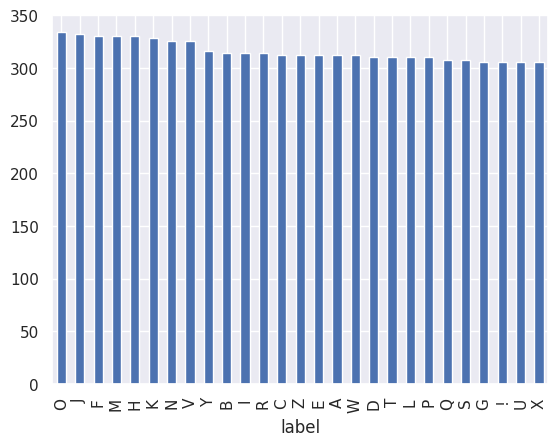

In [15]:
# Check for NaN values in the 'label' column after concatenation
print("Number of NaN values in 'label' column before dropping:", df.label.isna().sum())

# Drop rows where the 'label' is NaN
df.dropna(subset=['label'], inplace=True)

# Re-check for NaN values (should be 0)
print("Number of NaN values in 'label' column after dropping:", df.label.isna().sum())

# Convert the 'label' column to integer type before applying the lambda function
df['label'] = df['label'].astype(int)

# Now attempt the conversion to int and apply the lambda function
df.label.apply(lambda index_letter: alphabet[ index_letter ])

# Calculate and plot value counts as originally intended
counts = df.label.apply(lambda index_letter: alphabet[ index_letter ]).value_counts()
counts.plot(kind='bar')
plt.show()

In [16]:
np.unique(df.label.apply(lambda index_letter: alphabet[ index_letter ]))

array(['!', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
       'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y',
       'Z'], dtype=object)

Se está trabajando un dataset que por defecto ya viene partido en dos conjuntos: Train y Test.
La cantidad de muestras que hay en el conjunto de entrenamiento es de 12844 y en el de test hay 4267.
La última columna (`label`) corresponde a las diferentes clases que tiene este problema de clasificación.

**NO TIENE DATOS FALTANTES**

In [17]:
k = df.isna().sum()
((round(k/df.shape[0], 2) * 100).astype(int)).astype(str).str.cat(['' for i in range(len(k))], sep='%')

,0
pixel_0,0%
pixel_1,0%
pixel_2,0%
pixel_3,0%
pixel_4,0%
...,...
pixel_780,0%
pixel_781,0%
pixel_782,0%
pixel_783,0%


Se escalan los conjuntos $X_{train}$ y $X_{test}$ con `MinMaxScaler` en base a $X_{train}$

In [18]:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

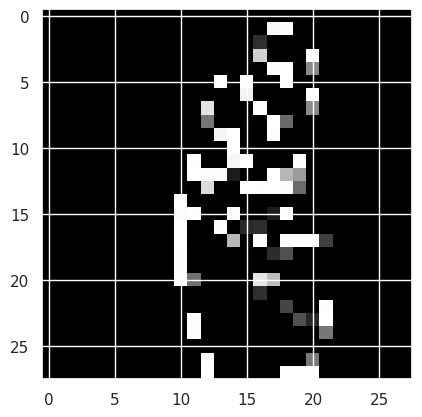

In [19]:
plt.imshow(np.array(X_train_scaled.iloc[1000]).reshape((28,28)), cmap="binary")
plt.show()

## Redimensionamiento
Hasta este punto, cada imagen se representa como un vector, sin embargo, dado que en el modelo de red neuronal convolucional nos interesa extraer información sobre la relación de un pixel con su alrededor, crearemos un nuevo dataset redimensionado para este modelo.

In [20]:
X_train_scaled_2d = np.reshape(np.array(X_train_scaled), (X_train_scaled.shape[0],28,28))
y_train_array = np.array(y_train)

X_test_scaled_2d = np.reshape(np.array(X_test_scaled), (X_test_scaled.shape[0],28,28))
y_test_array = np.array(y_test)

image = X_train_scaled_2d[1000]

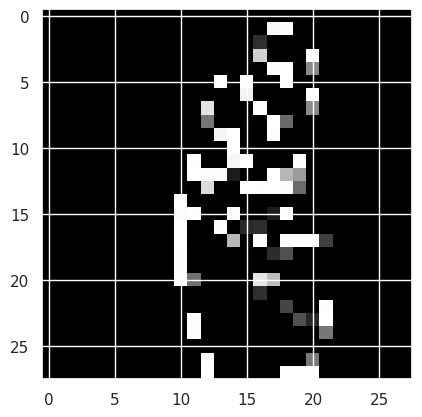

In [21]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the image
ax.imshow(image, cmap='binary')

# Show the plot
plt.show()

#Modelos a considerar
* Feedforward neural network
* Convolutional neural network

Definamos una función experimentos, la metodología de validación a usar es "KFolds"

## Feedforward neural network

In [26]:
def get_model(num_classes=2, nlayers=3, lsize=64, compile=True, dropout=None):
    print("using",num_classes,"classes")
    print(f"Entrenando modelo lsize = {lsize} - nlayers = {nlayers}")
    inputs = tf.keras.Input(shape=(784,), name="input_1")

    layers = inputs
    for _ in range(nlayers):
        layers = tf.keras.layers.Dense(lsize, activation=tf.nn.relu)(layers)
        if dropout is not None:
            layers = tf.keras.layers.Dropout(dropout)(layers)

    predictions = tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax, name="output_1")(layers)
    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    if compile:
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    return model

In [22]:
def experiments_dense_model(X, y):
    """
    Función que realiza los experimentos con el modelo
    red neuronal convolucional, estos experimentos constan de:
    - Estrategia de validacion: K-Fold
    - Etapa de entrenamiento
    - Fase de validación
    X_train: Matriz 3D (i,j,k) donde la matriz i representa la imagen i y j y k los subíndices de la imagen
    y_train: Vector de numpy con la variable de salida
    retorna: Matriz de confusion, recall, precision
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
    nlayers = [2**i for i in range(5)]
    lsize = [2**i for i in range(5, 10)]



    # Nuestro hiperparámetro a considerar será si se aplica max_pooling o no
    for n_layers, l_size in product(nlayers, lsize):
        #Metodología de validación


        #Entrenamiento del modelo
        model = get_model(num_classes=27, lsize=l_size, nlayers=n_layers)
        model.fit(X_train, y_train, epochs=128, verbose=0)

        print(f"Modelo lsize = {l_size} - nlayers = {n_layers}")
        print("Entrenamiento")
        model.evaluate(x=X_train,y=y_train)
        print("Validación")
        model.evaluate(x=X_test,y=y_test)





## Convolutional neural network

In [23]:
def get_conv_model(num_classes=3, img_size=32, channels=3, use_maxpooling=True, compile=True, filters_per_layer=[32,16], size_filter_per_layer=[7,5]):
    print ("using",num_classes,"classes")
    print(f"Entrenando modelo max_pooling = {use_maxpooling} - size_filter_per_layer = {size_filter_per_layer} - filters_per_layer = {filters_per_layer}")
    #inputs = tf.keras.Input(shape=(img_size,img_size,3), name="input_1")

    inputs = tf.keras.Input(shape=(img_size,img_size,channels), name="input_1")
    layers = tf.keras.layers.Conv2D(filters_per_layer[0],(size_filter_per_layer[0],size_filter_per_layer[0]), activation="relu",padding='same')(inputs)

    for n_filters, size_filters in zip(filters_per_layer[1:], size_filter_per_layer[1:]):
        layers = tf.keras.layers.Conv2D(n_filters,(size_filters,size_filters), activation="relu", padding='same')(layers)
        if use_maxpooling:
            layers = tf.keras.layers.MaxPool2D((2,2))(layers)

    layers = tf.keras.layers.Flatten()(layers)
    layers = tf.keras.layers.Dense(128, activation=tf.nn.relu)(layers)
    layers = tf.keras.layers.Dense(128, activation=tf.nn.relu)(layers)
    layers = tf.keras.layers.Dropout(0.5)(layers)
    predictions = tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax, name="output_1")(layers)
    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    if compile:
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    return model

In [24]:
def experiments_conv_model(X, y):
    """
    Función que realiza los experimentos con el modelo
    red neuronal convolucional, estos experimentos constan de:
    - Estrategia de validacion: K-Fold
    - Etapa de entrenamiento
    - Fase de validación
    X_train: Matriz 3D (i,j,k) donde la matriz i representa la imagen i y j y k los subíndices de la imagen
    y_train: Vector de numpy con la variable de salida
    retorna: Matriz de confusion, recall, precision
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
    max_pooling_hyperparams = [True, False]
    size_filter_per_layer_hyperparams = [
        [7,5,3],
        [9,7,5,3],
        [11,9,7,5,3],
    ]

    filters_per_layer_hyperparams = [
        [32, 16, 8],
        [64,32, 16, 8],
        [128,64,32, 16, 8],

    ]

    # Nuestro hiperparámetro a considerar será si se aplica max_pooling o no
    for max_pooling, (size_filter_per_layer, filters_per_layer) in product(max_pooling_hyperparams, zip(size_filter_per_layer_hyperparams, filters_per_layer_hyperparams)):
        #Metodología de validación


        #Entrenamiento del modelo
        model = get_conv_model(num_classes=27, img_size=28, channels=1, use_maxpooling=max_pooling, size_filter_per_layer=size_filter_per_layer, filters_per_layer=filters_per_layer)
        model.fit(X_train, y_train, epochs=4)

        print(f"Modelo max_pooling = {max_pooling} - size_filter_per_layer = {size_filter_per_layer} - filters_per_layer = {filters_per_layer}")
        model.evaluate(x=X_test,y=y_test)





## Experimentación

Modelo convolucional

In [ ]:
resultados_conv_model = experiments_conv_model(X_train_scaled_2d, y_train_array)

using 27 classes
Entrenando modelo max_pooling = True - size_filter_per_layer = [7, 5, 3] - filters_per_layer = [32, 16, 8]
Epoch 1/4
269/269 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.1146 - loss: 3.0344
Epoch 2/4
269/269 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6831 - loss: 0.9460
Epoch 3/4
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8386 - loss: 0.4493
Epoch 4/4
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9150 - loss: 0.2502
Modelo max_pooling = True - size_filter_per_layer = [7, 5, 3] - filters_per_layer = [32, 16, 8]
133/133 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9636 - loss: 0.1037
using 27 classes
Entrenando modelo max_pooling = True - size_filter_per_layer = [9, 7, 5, 3] - filters_per_layer = [64, 32, 16, 8]
Epoch 1/4
269/269 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.0350 - loss: 3.2983
Epoch 2/4
269/269 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0680 - loss: 3.1856
Epoch 3/4
269/269 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy:

Modelo perceptrón multicapa

In [ ]:
experiments_dense_model(X_train_scaled, y_train_array)

using 27 classes
Entrenando modelo lsize = 32 - nlayers = 1
Modelo lsize = 32 - nlayers = 1
Entrenamiento
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0380 - loss: 3.2948
Validación
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0341 - loss: 3.2982  
using 27 classes
Entrenando modelo lsize = 64 - nlayers = 1
Modelo lsize = 64 - nlayers = 1
Entrenamiento
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0380 - loss: 3.2948  
Validación
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0341 - loss: 3.2982
using 27 classes
Entrenando modelo lsize = 128 - nlayers = 1
Modelo lsize = 128 - nlayers = 1
Entrenamiento
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0086
Validación
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9528 - loss: 0.1856
using 27 classes
Entrenando modelo lsize = 256 - nlayers = 1
Modelo lsize = 256 - nlayers = 1
Entrenamiento
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 9.0830e-04
Valida

In [28]:
mlp_accuracy_training = """
0.0399
0.0399
1.0000
1.0000
1.0000
0.2449
0.8308
0.9998
1.0000
0.9866
0.8331
0.9947
0.9608
1.0000
0.9943
0.9147
0.0399
0.8015
0.6390
0.0399
0.0399
0.0399
0.0399
0.0399
0.0399
"""

mlp_accuracy_testing = """
0.0370
0.0370
0.9707
0.9766
0.9736
0.2241
0.7686
0.9998
0.9769
0.9507
0.7679
0.9947
0.9148
0.9830
0.9290
0.8410
0.0399
0.7306
0.5638
0.0370
0.0370
0.0370
0.0370
0.0370
0.0370
"""

In [29]:
mlp_accuracy_training = np.array(mlp_accuracy_training.split("\n")[1:-1]).astype(float)
mlp_accuracy_testing = np.array(mlp_accuracy_testing.split("\n")[1:-1]).astype(float)

In [30]:
np.argmin(np.abs(mlp_accuracy_training - mlp_accuracy_testing))

np.int64(7)

## Comparación mejores modelos

### Perceptrón multicapa

In [31]:
mlp_best_model = get_model(num_classes=27, nlayers=2, lsize=128)

using 27 classes
Entrenando modelo lsize = 128 - nlayers = 2


In [32]:
mlp_best_model.fit(X_train_scaled, y_train_array, epochs=12)

Epoch 1/12
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0766 - loss: 3.2348
Epoch 2/12
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4765 - loss: 1.8963
Epoch 3/12
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6869 - loss: 1.0918
Epoch 4/12
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7841 - loss: 0.7555
Epoch 5/12
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8288 - loss: 0.5775
Epoch 6/12
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8628 - loss: 0.4551
Epoch 7/12
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8808 - loss: 0.3948
Epoch 8/12
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8879 - loss: 0.3656
Epoch 9/12
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9064 - loss: 0.3148
Epoch 10/12
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9230 - loss: 0.2622
Epoch 11/12
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9356 - loss: 0.2216
Epoch 12/12
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

In [33]:
y_test_est = mlp_best_model.predict(X_test_scaled)


134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [34]:
# Check for NaN values in the 'label' column in the test dataset
print("Number of NaN values in 'label' column in df_test before dropping:", df_test.label.isna().sum())

# Drop rows where the 'label' is NaN specifically from the test dataframe
df_test.dropna(subset=['label'], inplace=True)

# Re-check for NaN values (should be 0 if any were dropped)
print("Number of NaN values in 'label' column in df_test after dropping:", df_test.label.isna().sum())

# Convert the 'label' column to integer type after dropping NaNs
df_test['label'] = df_test['label'].astype(int)

X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

# --- Changes Start Here ---
# Ensure y_test_array is created from the cleaned df_test for comparison
y_test_array = np.array(y_test)
# Ensure X_test_scaled is created from the cleaned df_test for comparison
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
# --- Changes End Here ---


# Now proceed with the evaluation
mlp_best_model.evaluate(X_test_scaled, y_test_array)

Number of NaN values in 'label' column in df_test before dropping: 0
Number of NaN values in 'label' column in df_test after dropping: 0
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9328 - loss: 0.2267


[0.32050782442092896, 0.8996953368186951]

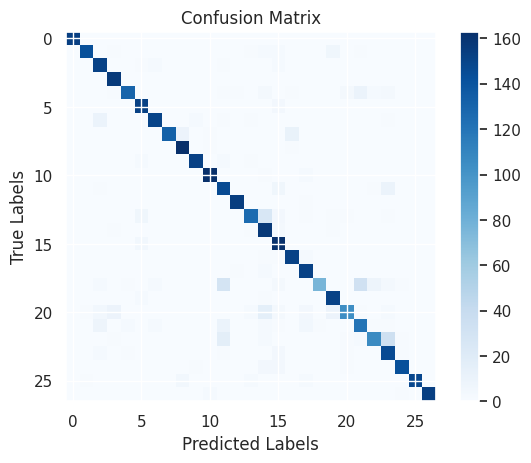

In [35]:
cm = confusion_matrix(y_test_array, np.argmax(y_test_est, axis=1))

# Display confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Red neuronal convolucional

In [ ]:
conv_best_model = get_conv_model(num_classes=27, channels=1, img_size=28, filters_per_layer=[32,16,8], size_filter_per_layer=[7,5,3])

using 27 classes
Entrenando modelo max_pooling = True - size_filter_per_layer = [7, 5, 3] - filters_per_layer = [32, 16, 8]


In [ ]:
conv_best_model.fit(X_train_scaled_2d, y_train_array, epochs=12)

Epoch 1/12
402/402 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1157 - loss: 3.0399
Epoch 2/12
402/402 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7799 - loss: 0.6794
Epoch 3/12
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9044 - loss: 0.2861
Epoch 4/12
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9421 - loss: 0.1760
Epoch 5/12
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9632 - loss: 0.1130
Epoch 6/12
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9670 - loss: 0.0971
Epoch 7/12
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9782 - loss: 0.0687
Epoch 8/12
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9805 - loss: 0.0595
Epoch 9/12
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9795 - loss: 0.0593
Epoch 10/12
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9820 - loss: 0.0524
Epoch 11/12
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9868 - loss: 0.0379
Epoch 12/12
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/ste

In [ ]:
y_test_est = conv_best_model.predict(X_test_scaled_2d)

134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


Number of NaN values in 'label' column in df_test before dropping: 0
Number of NaN values in 'label' column in df_test after dropping: 0
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9927 - loss: 0.0202


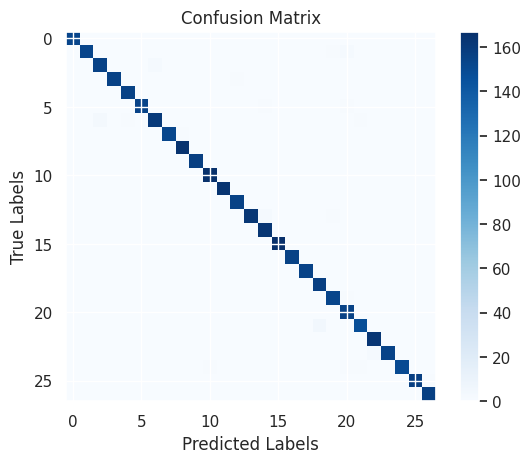

In [ ]:
# Check for NaN values in the 'label' column in the test dataset
print("Number of NaN values in 'label' column in df_test before dropping:", df_test.label.isna().sum())

# Drop rows where the 'label' is NaN specifically from the test dataframe
df_test.dropna(subset=['label'], inplace=True)

# Re-check for NaN values (should be 0 if any were dropped)
print("Number of NaN values in 'label' column in df_test after dropping:", df_test.label.isna().sum())

# Convert the 'label' column to integer type after dropping NaNs
df_test['label'] = df_test['label'].astype(int)

# --- Changes Start Here ---
# Recreate X_test and y_test from the cleaned df_test
X_test = df_test.iloc[:,:-1]
y_test = df_test.iloc[:,-1]

# Recreate y_test_array from the cleaned y_test
y_test_array = np.array(y_test)

# Ensure X_test_scaled is created from the cleaned X_test for scaling
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

# Recreate X_test_scaled_2d from the cleaned and scaled X_test for prediction
X_test_scaled_2d = np.reshape(np.array(X_test_scaled), (X_test_scaled.shape[0],28,28))
# --- Changes End Here ---


# NOW calculate the predictions using the cleaned and scaled test data
y_test_est = conv_best_model.predict(X_test_scaled_2d)


# Now proceed with the evaluation and confusion matrix calculation
conv_best_model.evaluate(X_test_scaled_2d, y_test_array)

cm = confusion_matrix(y_test_array, np.argmax(y_test_est, axis=1))

# Display confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:

conv_best_model.evaluate(X_test_scaled_2d, y_test_array)

134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9927 - loss: 0.0202


[0.02162954956293106, 0.9932036399841309]